<a href="https://colab.research.google.com/github/mark777os/Base_of_Data/blob/master/%D0%A1%D0%B5%D0%BD%D1%82%D1%8F%D0%B1%D1%80%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_Light_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_1_%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85_%D1%86%D0%B8%D1%84%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание рукописных цифр из набора данных MNIST с помощью Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [0]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential #НС прямого распространения
from tensorflow.keras.layers import Dense #Полносвязные слой
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [0]:
#Загрузка данных Mnist
#x_train_org - входные картинки, обучающая выбрка
#y_train_org - выходные индексы, обучающая выборка
#x_test_org - входные картинки, тестовая выбрка
#y_test_org - выходные индексы, тестовая выборка
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


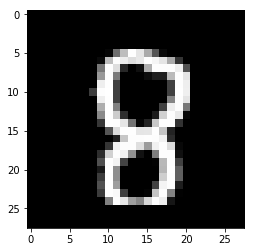

In [0]:
n = 188 #Номер картинки

#Отрисовка картинки
#Image.fromarray - создание картинки по массиву
#.convert('RGBA') - преобразование в RGBA формат
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности данных в наборе**

In [0]:
#Меняем формат входных картинок с 28х28 на 784х1
#Это нужно для удобства работы с полносвязным слоем (Dense)
#С двумерной картинкой мы будем работать в будущем с помощью свёрточных сетей
#Функция .reshape меняет размер массива
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация данных**

In [0]:
#Нормализуем входные картинки
#НС лучше работают, если данные нормаваны от 0 до 1
#Сейчас значения во входных картинках от 0 до 255
#Надо разделить картинки на 255
#И сначала преобразовать картинки в тип float (цифры с плавающей точкой)
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255 

**Работа с правильными ответами**

In [0]:
#Выводим пример индекса в выходных данных
print(y_train_org[n])

8


**Преобразуем метки в формат one hot encoding**

In [0]:
#НС сложно работать с чистыми индексами от 0 до 9
#Ей проще работать с данными в формате one hot encoding
#Это формат из 10 цифр - все 0 и одна 1 там, где правильный ответ
#Например
#Индекс 0 - это [1 0 0 0 0 0 0 0 0 0]
#Индекс 2 - это [0 0 1 0 0 0 0 0 0 0]
#Индекс 9 - это [0 0 0 0 0 0 0 0 0 1]
#Это делается функцией utils.to_categorical(
#Второй параметр - это количество классов, у нас - 10
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

**Правильный ответ в формате one hot encoding**

In [0]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(60000, 10)


In [0]:
#Выводим пример одного выходного вектора
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [0]:
#Создаём сеть прямого распространения
#Пока она пустая
#Подробнее на https://keras.io/models/sequential/
model = Sequential()

**Добавляем уровни сети**


In [0]:
#Добавляем в сеть полносвязные слои
#Dense - полносвязный слой, подробнее на https://keras.io/layers/core/
#Первый парамерт - количество нейронок, обычно от 2 до 2000, подбирается в ходе исследования
#input_dim - размер входного вектора, указывается только в первом слое сети
#activation - активационная функция нейронов данного слоя
#relu - одна из активационных функций, подробнее на https://keras.io/activations/
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu"))

#Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
#activation="softmax" - активационная функция, 
#которая делает сумму всех значений нейронов слой, равной 1
#Подробнее https://keras.io/activations/
model.add(Dense(10, activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**Компилируем сеть**

In [0]:
#Нейронку надо "скомпилировать"
#При компиляции мы задаём несколько параметров
#loss - функция ошибки, которую оптимизирует сеть
#categorical_crossentropy - одна из функций ошибки, подходящая для классификации нескольких классов, подробнее https://keras.io/activations/
#optimizer - алгоритм обучения НС
#adam - один из алгоритмов обучения НС, подробнее https://keras.io/optimizers/
#metrics - метрика качества обучения, измеряется после каждой эпохи обучения
#accuracy - метрика, процент правильно распознанных примеров, подробнее https://keras.io/metrics/
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Вывод структуры нейронки
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [0]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка, перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выбрки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
#validation_split - процент данных, на которых сеть не обучается, на которых мы измеряем точность распознавания
model.fit(x_train, y_train, batch_size=200, epochs=20,  verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 47us/sample - loss: 0.2610 - acc: 0.9224 - val_loss: 0.1360 - val_acc: 0.9587
Epoch 2/20
48000/48000 [==============================] - 2s 32us/sample - loss: 0.0878 - acc: 0.9734 - val_loss: 0.0842 - val_acc: 0.9744
Epoch 3/20
48000/48000 [==============================] - 2s 31us/sample - loss: 0.0569 - acc: 0.9823 - val_loss: 0.0829 - val_acc: 0.9753
Epoch 4/20
48000/48000 [==============================] - 2s 32us/sample - loss: 0.0348 - acc: 0.9884 - val_loss: 0.0929 - val_acc: 0.9743
Epoch 5/20
48000/48000 [==============================] - 2s 31us/sample - loss: 0.0246 - acc: 0.9923 - val_loss: 0.0806 - val_acc: 0.9769
Epoch 6/20
48000/48000 [==============================] - 2s 32us/sample - loss: 0.0181 - acc: 0.9942 - val_loss: 0.0980 - val_acc: 0.9747
Epoch 7/20
48000/48000 [==============================] - 2s 32us/sample - loss: 0.0153 - acc: 0.9953 - val_loss: 0.

## Сохраняем обученную нейронную сеть

Записываем обученную нейронную сеть в файл `mnist_dense.h5`

In [0]:
#Сохраняем нейронку в файл
model.save("mnist_dense.h5")


Проверяем, что файл сохранился

In [0]:
#Выводим на экран список текущих файлов
!ls

mnist_dense.h5	sample_data


**Сохраняем файлы на локальный компьютер**

In [0]:
#Скачиваем файл локально на компьютер
files.download("mnist_dense.h5")

Если хотите использовать обученную нейронную сеть на своем компьютере:

```
from keras.models import load_model
model = load_model('mnist_dense.h5')
```

## Используем сеть для распознавания рукописных цифр

In [0]:
#Номер тестовой цифры, которую будем распознавать
n_rec = 2223

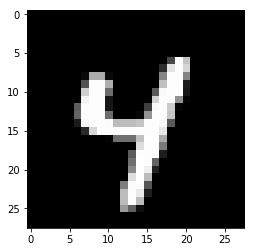

In [0]:
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

**Меняем размерность изображения и нормализуем его**

In [0]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
#Потому что нейронка принимает именно массов примеров для распознавания
#Мы делаем массив из одного примеры
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [0]:
#Распознаём ннаш пример
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [0]:
#Выводим результат, это 10 цифр
#Сумма значений равна 1, так как финальный слой с активационной функций softmax
print(prediction)

[[1.9128024e-18 2.3390388e-13 2.1945682e-20 1.9889210e-21 1.0000000e+00
  2.3097902e-18 5.1134071e-16 1.5867533e-13 4.9237035e-11 2.3106289e-13]]


**Преобразуем результаты из формата one hot encoding**

In [0]:
#Получаем индекс самого большого элемента
#Это итоговая цифра, которую распознала сеть
prediction = np.argmax(prediction)
print(prediction)

4


**Печатаем правильный ответ**

In [0]:
#выводим правильный ответ, для сравнения
print(y_test_org[n_rec])

4


## Загружаем свою картинку

In [0]:
#Загружаем файл со своей рукописной цифрой
files.upload()

Saving 9_2.png to 9_2.png


{'9_2.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x89\x00\x00\x00y\x08\x02\x00\x00\x00\x82\xd4\x95\x87\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x03\xf1IDATx^\xed\x9dQn\x1b1\x0c\x05}.\x1fh\xcf\xe3\xd3\xece\xf60\xae\x9a\xc7\xd2\xab\xc7e\xd1\xa0\xa6\xcc\x16o0\xf9\x08\x10\x9b\x92G?\x8a\x01\xfb\xf6\x14]Q\x9b\xbe\xa8M_\xd4\xa6/j\xd3\x17\xb5\xe9\x8b\xda\xf4Em\xfa\xa26}Q\x9b\xbe\xa8M_\xd4\xa6/j\xd3\x17\xb5\xe9\xcb\'\xda\x1c{\xe6v\xbfGo\xef <\xab\xb9\x1f\xcfK;\xa06\\\x05v@m\xb8\n\xec\x80\xdap\x15\xd8\x01\xb5\xe1*\xb0\x03j\xc3U`\x07\xd4\x86\xab\xc0\x0e\x14\xb7\xd9\xb7\xa8\xbdZ]\x18\xed/|\x1c\xcfKW\xa26\\\x05R\x12w%j\xc3U %qW\xa26\\\x05R\x12w%j\xc3U %qW\xa26\\\x05R\x12w%j\xc3U %qW\xf2\xc66{tt\x88\xfe\x16\xfa\xdb\x9f\xd2\xcd\xe3\xec%\xc7\xfe\x88\xf2k\xff\xcb\x94m\xbf\xd4f,Am\x12B\x15h3\x96\xa06\t\xa1\n\xb4\x19KP\x9b\x84P\x05\xda\x8c%\xa8MB\xa8\x02m\xc6\x12\xd4&!T\x816

Проверяем загрузку картинки

In [0]:
!ls

9_2.png  9.png	sample_data


Загружаем картинку из файла

In [0]:
#Указывает путь к файлу
img_path = '9_2.png'
#Загружаем картинку, меняем размер на 28х28, формат на оттенки серого
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

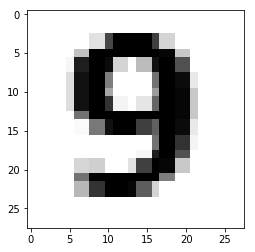

In [0]:
#Выводим картинку
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [0]:
#Преобразуем картинку в массив
x = image.img_to_array(img)
#Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
#Инвертируем изображение, нам надо белое на чёрном фоне
x = 255 - x
#Нормализуем изображение
x /= 255

Запускаем распознавание

In [0]:
#Распознаём картинку
prediction = model.predict(x)

Результаты распознавания

In [0]:
#Выводим результат
prediction

array([[8.0555890e-10, 7.0287101e-08, 4.0093163e-08, 1.5769515e-04,
        2.0342052e-02, 7.7709892e-06, 1.3275576e-12, 3.4342136e-08,
        1.1195215e-02, 9.6829712e-01]], dtype=float32)

In [0]:
#Выводим распознанную цифру
print(np.argmax(prediction))

9
